### **Introduction**
In this project, I analyzed Charles Darwin's use of persuasive language in his seminal work, On the Origin of Species. My objective was to explore how Darwin employs different rhetorical techniques—such as evidence-based arguments, emphasis, and refutation—to build his case for natural selection. By systematically examining the frequency and distribution of specific persuasive terms across the chapters, I aimed to understand the patterns and strategies Darwin used to communicate his revolutionary ideas.

To achieve this, I first imported the text of the book and prepared it for analysis by cleaning and standardizing the content. I identified key persuasive terms in three categories: evidence (e.g., "evidence," "proof"), emphasis (e.g., "clearly," "certainly"), and refutation (e.g., "however," "but"). I then counted the occurrences of these terms in each chapter to understand how Darwin structured his arguments.

To fulfill the project objective of practicing text processing, I applied several techniques, including text extraction, case normalization, regular expression matching, and frequency analysis. These methods allowed me to effectively manipulate and analyze the text data, demonstrating essential skills in text processing, such as data cleaning, term frequency calculation, and ratio analysis. The project provided hands-on experience in processing and analyzing large textual datasets, helping to refine my understanding of text processing workflows and tools.

By calculating the ratios of these terms within each chapter, I explored various potentials:

Identifying Dominant Persuasive Strategies: Understanding which type of persuasive language (evidence, emphasis, or refutation) Darwin relies on most heavily in different parts of his text.

Exploring Patterns Across Chapters: Discovering whether there are chapters where Darwin introduces new ideas using evidence-based terms, emphasizes key points, or predominantly addresses counterarguments.

Assessing Variations in Rhetorical Style: Observing how the balance of these persuasive strategies shifts throughout the book, potentially indicating different phases of argumentation or changes in his communication style.

This analysis not only provides insights into Darwin's rhetorical methods but also offers a model for studying persuasive language in scientific literature, revealing how authors use different strategies to engage readers, build credibility, and address opposing viewpoints.

#### **Importing Necessary Libraries**

In this initial code cell, I import all the necessary third-party libraries used throughout this notebook. We use:
- `numpy` (`np`) for numerical operations.
- `matplotlib.pyplot` (`plt`) for data visualization.
- `seaborn` (`sns`) for enhanced visualizations and applying color palettes, including color-blind-friendly options.
- `openai` for interacting with the OpenAI API to summarize text and evaluate its tone, which will help analyze correlations between chapter summaries, tone, and the frequency of persuasive language.
- `os` for accessing environment variables securely, such as the OpenAI API key.

Additional libraries may be added here as needed to support other functionalities in the analysis.


In [453]:
# Install the OpenAI library (only needed if not already installed)
!pip install openai

# Import necessary libraries
import os  # For accessing environment variables
import openai  # For interacting with the OpenAI API
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations

import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations



Python(27993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


### **Loading the Text File**

To begin, I specify the relative path (text file in the working directory) to the text file containing *On the Origin of Species* and open it in read mode using Python. The purpose of this step is to read the entire content of the text into a variable, allowing us to perform subsequent processing and analysis. The `encoding='utf-8'` parameter is used to handle any special characters in the document, ensuring the text is read correctly. This step sets up the raw data needed for further analysis.


In [454]:
# Updated relative path to the text file
file_path = 'On the Origin of Species.txt'

# Open the file and read its contents
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()


### **Extracting and Cleaning the Text Content**

In this step, I identify the starting point of the actual content by searching for a specific phrase ("When on board H.M.S. ‘Beagle,’ as naturalist,") and extracting the text from that point onward. The extracted text is converted to lowercase to standardize the format for analysis. We then remove any punctuation and special characters using regular expressions, ensuring that the text is clean and ready for processing. Finally, we display the first 500 characters of the cleaned text to verify the content and confirm that the extraction and cleaning processes were successful.


In [455]:
# Find the start of the actual content
start_content = text.find("When on board H.M.S. ‘Beagle,’ as naturalist,")  # Example keyword; change as needed

# Extract the content starting from the identified point
book_content = text[start_content:]

# Convert to lowercase
book_content = book_content.lower()

# Remove punctuation and special characters using regular expressions
import re
book_content_clean = re.sub(r'[^\w\s]', '', book_content)

# Display the first 500 characters of the cleaned content to verify
print(book_content_clean[:500])


when on board hms beagle as naturalist i was much struck with
certain facts in the distribution of the inhabitants of south america
and in the geological relations of the present to the past inhabitants
of that continent these facts seemed to me to throw some light on the
origin of speciesthat mystery of mysteries as it has been called by
one of our greatest philosophers on my return home it occurred to me
in 1837 that something might perhaps be made out on this question by
patiently accumulatin


### **Defining and Counting Persuasive Terms**

In this step, we define a list of persuasive terms grouped into three categories: **evidence** (e.g., "evidence," "proof"), **emphasis** (e.g., "clearly," "certainly"), and **refutation** (e.g., "however," "but"). A dictionary is created to store the frequency of each term within these categories. We use regular expressions to count the occurrences of each term in the cleaned text. The results are then displayed, showing how often each persuasive term appears throughout the text. This helps us understand Darwin's use of different rhetorical techniques in his writing.


In [456]:
# Define the list of persuasive terms grouped by category
persuasive_terms = {
    'evidence': ['evidence', 'proof', 'demonstrate', 'experiment', 'observation', 'fact'],
    'emphasis': ['clearly', 'certainly', 'undoubtedly', 'without a doubt', 'obviously'],
    'refutation': ['however', 'nevertheless', 'on the contrary', 'yet', 'but', 'despite']
}

# Dictionary to store term frequencies
term_frequencies = {category: {term: 0 for term in terms} for category, terms in persuasive_terms.items()}

# Count occurrences of each term using regular expressions
for category, terms in persuasive_terms.items():
    for term in terms:
        term_frequencies[category][term] = len(re.findall(r'\b' + term + r'\b', book_content_clean))

# Display the term frequencies
for category, terms in term_frequencies.items():
    print(f"\n{category.capitalize()} Terms:")
    for term, count in terms.items():
        print(f"{term}: {count}")



Evidence Terms:
evidence: 65
proof: 5
demonstrate: 0
experiment: 14
observation: 3
fact: 134

Emphasis Terms:
clearly: 43
certainly: 63
undoubtedly: 14
without a doubt: 0
obviously: 5

Refutation Terms:
however: 83
nevertheless: 35
on the contrary: 1
yet: 199
but: 856
despite: 1


### **Analyzing Persuasive Terms by Chapter**

In this step, we split the cleaned text into chapters using regular expressions to identify chapter headings. This allows us to analyze the frequency of each persuasive term within individual chapters. We initialize a dictionary to store the term frequencies for each category (evidence, emphasis, and refutation) and iterate through each chapter to count occurrences of these terms using regular expressions. The term frequencies by chapter are printed to verify the distribution of persuasive language throughout the text. This analysis helps us understand the variation in Darwin's use of rhetorical techniques across different chapters.


In [457]:
# Split the text into chapters using regular expressions
chapters = re.split(r'chapter [ivxlcdm]+', book_content_clean)  # Adjust to match chapter headings

# Initialize a dictionary to store term frequencies per chapter
chapter_term_frequencies = {category: {term: [] for term in terms} for category, terms in persuasive_terms.items()}

# Analyze each chapter
for chapter in chapters:
    for category, terms in persuasive_terms.items():
        for term in terms:
            count = len(re.findall(r'\b' + term + r'\b', chapter))
            chapter_term_frequencies[category][term].append(count)

# Print term frequencies per chapter to verify
for category, terms in chapter_term_frequencies.items():
    print(f"\n{category.capitalize()} Terms by Chapter:")
    for term, counts in terms.items():
        print(f"{term}: {counts}")



Evidence Terms by Chapter:
evidence: [0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 5, 1, 0, 0, 2, 11, 0, 0, 7, 3, 1, 0, 0, 0, 13, 3, 7, 0, 3, 1]
proof: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2]
demonstrate: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
experiment: [0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
observation: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
fact: [0, 0, 0, 0, 9, 2, 0, 1, 8, 1, 11, 6, 0, 1, 8, 14, 0, 0, 8, 11, 0, 1, 5, 0, 12, 12, 15, 0, 0, 9]

Emphasis Terms by Chapter:
clearly: [0, 0, 0, 0, 2, 2, 0, 3, 1, 0, 1, 2, 0, 1, 4, 6, 0, 0, 0, 3, 0, 3, 1, 0, 2, 1, 6, 0, 1, 4]
certainly: [0, 0, 0, 0, 9, 2, 0, 2, 8, 0, 6, 2, 0, 0, 7, 4, 0, 0, 4, 3, 1, 0, 0, 0, 3, 3, 3, 1, 3, 2]
undoubtedly: [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0]
without a doubt: [0, 0,

### **Calculating and Analyzing the Ratios of Persuasive Terms**

In this step, we calculate the ratios of evidence, emphasis, and refutation terms for each chapter. We start by iterating over each chapter and summing the counts of terms in each category. The total number of persuasive terms for each chapter is computed by adding these sums. The ratio for each category is then calculated by dividing the total count of terms in that category by the total number of persuasive terms in the chapter. If a chapter has no persuasive terms, the ratio is set to `0.00` to avoid division by zero. The results are printed to verify the distribution and dominance of each type of persuasive term across chapters. This analysis provides insights into which persuasive techniques Darwin relies on in different parts of the text.


In [458]:


# Initialize lists to store the total counts and ratios for each chapter
total_terms_by_chapter = []
evidence_ratios = []
emphasis_ratios = []
refutation_ratios = []

# Calculate the total count of persuasive terms for each chapter
for i in range(len(chapters)):  # Iterate over the number of chapters
    # Sum counts of all terms for each category in a chapter
    total_evidence = sum(chapter_term_frequencies['evidence'][term][i] for term in persuasive_terms['evidence'])
    total_emphasis = sum(chapter_term_frequencies['emphasis'][term][i] for term in persuasive_terms['emphasis'])
    total_refutation = sum(chapter_term_frequencies['refutation'][term][i] for term in persuasive_terms['refutation'])
    
    # Calculate the total number of terms for the chapter
    total_terms = total_evidence + total_emphasis + total_refutation
    total_terms_by_chapter.append(total_terms)

    # Calculate ratios for each category
    evidence_ratios.append(total_evidence / total_terms if total_terms > 0 else 0)
    emphasis_ratios.append(total_emphasis / total_terms if total_terms > 0 else 0)
    refutation_ratios.append(total_refutation / total_terms if total_terms > 0 else 0)

# Print the ratios to verify
for chapter_num in range(len(chapters)):
    print(f"Chapter {chapter_num + 1}:")
    print(f"  Evidence Ratio: {evidence_ratios[chapter_num]:.2f}")
    print(f"  Emphasis Ratio: {emphasis_ratios[chapter_num]:.2f}")
    print(f"  Refutation Ratio: {refutation_ratios[chapter_num]:.2f}\n")


Chapter 1:
  Evidence Ratio: 0.00
  Emphasis Ratio: 0.00
  Refutation Ratio: 1.00

Chapter 2:
  Evidence Ratio: 0.00
  Emphasis Ratio: 0.00
  Refutation Ratio: 0.00

Chapter 3:
  Evidence Ratio: 0.00
  Emphasis Ratio: 0.00
  Refutation Ratio: 0.00

Chapter 4:
  Evidence Ratio: 0.00
  Emphasis Ratio: 0.00
  Refutation Ratio: 1.00

Chapter 5:
  Evidence Ratio: 0.12
  Emphasis Ratio: 0.11
  Refutation Ratio: 0.77

Chapter 6:
  Evidence Ratio: 0.07
  Emphasis Ratio: 0.09
  Refutation Ratio: 0.84

Chapter 7:
  Evidence Ratio: 0.00
  Emphasis Ratio: 0.00
  Refutation Ratio: 0.00

Chapter 8:
  Evidence Ratio: 0.05
  Emphasis Ratio: 0.10
  Refutation Ratio: 0.85

Chapter 9:
  Evidence Ratio: 0.09
  Emphasis Ratio: 0.09
  Refutation Ratio: 0.82

Chapter 10:
  Evidence Ratio: 0.10
  Emphasis Ratio: 0.00
  Refutation Ratio: 0.90

Chapter 11:
  Evidence Ratio: 0.16
  Emphasis Ratio: 0.07
  Refutation Ratio: 0.77

Chapter 12:
  Evidence Ratio: 0.11
  Emphasis Ratio: 0.08
  Refutation Ratio: 0.82

C

#### **Visualizing the Ratios of Persuasive Terms by Chapter**

In this step, I use a horizontal bar chart to visually compare the ratios of evidence, emphasis, and refutation terms across all chapters of *On the Origin of Species*. A horizontal bar chart is chosen because it improves readability, especially when dealing with numerous categories (chapters) or longer labels. This style allows for easier comparison of ratios across chapters, making the differences between the persuasive techniques more evident.

Additionally, a color-blind-friendly palette is applied to ensure that the visualization is accessible to a wider audience, including those with color vision deficiencies. By using distinct and universally distinguishable colors, we aim to make the patterns and trends in Darwin's use of different persuasive terms clearer to all viewers.


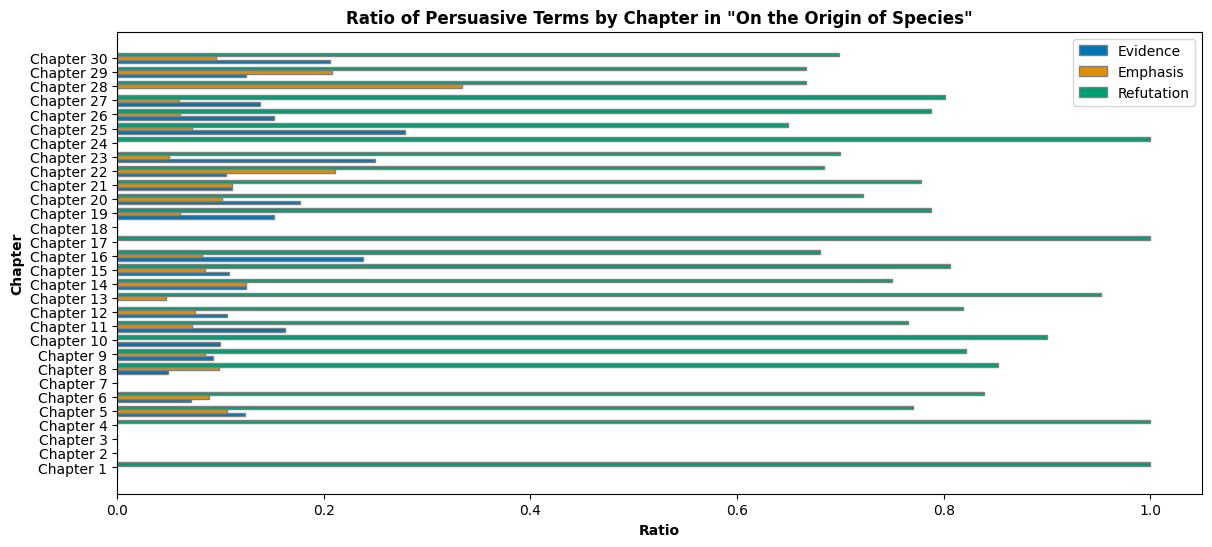

In [459]:
# Import seaborn for the color palette
import seaborn as sns

# Define chapter numbers as y-axis labels (since we are using a horizontal bar plot)
chapters = np.arange(1, len(evidence_ratios) + 1)

# Width of each bar
bar_width = 0.25

# Positions for the bars
r1 = np.arange(len(chapters))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Choose a color-blind-friendly palette
colors = sns.color_palette("colorblind", 3)  # Selecting a palette with three distinct colors

# Plotting grouped horizontal bars
plt.figure(figsize=(14, 6))
plt.barh(r1, evidence_ratios, color=colors[0], height=bar_width, edgecolor='grey', label='Evidence')
plt.barh(r2, emphasis_ratios, color=colors[1], height=bar_width, edgecolor='grey', label='Emphasis')
plt.barh(r3, refutation_ratios, color=colors[2], height=bar_width, edgecolor='grey', label='Refutation')

# Adding labels and title
plt.ylabel('Chapter', fontweight='bold')  # y-axis label since the plot is horizontal
plt.xlabel('Ratio', fontweight='bold')
plt.title('Ratio of Persuasive Terms by Chapter in "On the Origin of Species"', fontweight='bold')
plt.yticks([r + bar_width for r in range(len(chapters))], [f"Chapter {i}" for i in chapters])
plt.legend()

plt.show()


#### **Term Frequency and Chapter Length Analysis**


In this analysis, we begin by splitting the book into individual chapters using regular expressions that match the chapter headings (e.g., "Chapter I", "Chapter II", etc.). For each chapter, we calculate the frequency of specific persuasive terms and store these counts for further analysis. Additionally, we compute the length of each chapter in terms of the number of words. The process is as follows:

We split the book content into chapters using re.split, ensuring that the chapter headings are correctly identified.
A dictionary of term frequencies is initialized to store the counts of each persuasive term, grouped by category, for every chapter.
We maintain a list to track the length of each chapter in number of words.
For each chapter, we:
Calculate the chapter length by counting the number of words.
For each category of persuasive terms, find and count the occurrences of each term in the chapter.
We print the term frequencies per chapter to verify the counts for each persuasive term.
Finally, we output the length of each chapter to provide context on how chapter size might influence the frequency of persuasive terms.
This method allows for a detailed breakdown of how persuasive language is distributed across the text, while also providing insight into the chapter lengths, which may affect the overall density of terms.



In [460]:
# Split the text into chapters using regular expressions
chapters = re.split(r'chapter [ivxlcdm]+', book_content_clean)  # Adjust to match chapter headings

# Initialize a dictionary to store term frequencies per chapter
chapter_term_frequencies = {category: {term: [] for term in terms} for category, terms in persuasive_terms.items()}

# List to store the length of each chapter
chapter_lengths = []

# Analyze each chapter
for chapter in chapters:
    chapter_lengths.append(len(chapter.split()))  # Calculate the number of words in each chapter
    for category, terms in persuasive_terms.items():
        for term in terms:
            count = len(re.findall(r'\b' + term + r'\b', chapter))
            chapter_term_frequencies[category][term].append(count)

# Print term frequencies per chapter to verify
for category, terms in chapter_term_frequencies.items():
    print(f"\n{category.capitalize()} Terms by Chapter:")
    for term, counts in terms.items():
        print(f"{term}: {counts}")

# Print chapter lengths
print("\nChapter Lengths (in number of words):")
for i, length in enumerate(chapter_lengths, 1):
    print(f"Chapter {i}: {length} words")



Evidence Terms by Chapter:
evidence: [0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 5, 1, 0, 0, 2, 11, 0, 0, 7, 3, 1, 0, 0, 0, 13, 3, 7, 0, 3, 1]
proof: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2]
demonstrate: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
experiment: [0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
observation: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
fact: [0, 0, 0, 0, 9, 2, 0, 1, 8, 1, 11, 6, 0, 1, 8, 14, 0, 0, 8, 11, 0, 1, 5, 0, 12, 12, 15, 0, 0, 9]

Emphasis Terms by Chapter:
clearly: [0, 0, 0, 0, 2, 2, 0, 3, 1, 0, 1, 2, 0, 1, 4, 6, 0, 0, 0, 3, 0, 3, 1, 0, 2, 1, 6, 0, 1, 4]
certainly: [0, 0, 0, 0, 9, 2, 0, 2, 8, 0, 6, 2, 0, 0, 7, 4, 0, 0, 4, 3, 1, 0, 0, 0, 3, 3, 3, 1, 3, 2]
undoubtedly: [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0]
without a doubt: [0, 0,

#### **Weighted Term Frequency Calculation Based on Chapter Length**

To account for differences in chapter lengths, we apply a weighting system to adjust the term frequencies accordingly. The process involves the following steps:

Chapter Weight Calculation:

We identify the longest chapter in the book and use its length as the baseline.
Each chapter is assigned a weight, calculated as the ratio of the chapter's length to the length of the longest chapter. This ensures that shorter chapters receive a proportional weight relative to the longest chapter.
Weighted Term Frequency Initialization:

We initialize a dictionary to store the weighted term frequencies for each persuasive term across all chapters. The terms are grouped by category.
Applying Weights:

For each category of persuasive terms, we apply the calculated weights to the term frequencies. The weighted frequency for each term is computed by multiplying the raw frequency by the chapter's weight. This approach allows us to adjust term frequencies based on chapter length, ensuring that terms from longer chapters do not disproportionately dominate the analysis.
Displaying Results:

The weighted term frequencies for each chapter are printed, categorized by persuasive term type, providing insight into how the adjusted frequencies compare to the raw counts.
This method offers a more balanced view of persuasive term usage across chapters of varying lengths, allowing for a more accurate interpretation of rhetorical strategies employed in the text.



In [461]:
# Calculate the weight for each chapter based on its length
max_length = max(chapter_lengths)  # Use the longest chapter as the baseline for weighting
chapter_weights = [length / max_length for length in chapter_lengths]  # Weight of each chapter

# Initialize a dictionary to store weighted term frequencies per chapter
weighted_term_frequencies = {category: {term: [] for term in terms} for category, terms in persuasive_terms.items()}

# Apply weights to the term frequencies per chapter
for category, terms in chapter_term_frequencies.items():
    for term, counts in terms.items():
        weighted_counts = [count * weight for count, weight in zip(counts, chapter_weights)]
        weighted_term_frequencies[category][term] = weighted_counts

# Display the weighted term frequencies per chapter
print("\nWeighted Term Frequencies by Chapter:")
for category, terms in weighted_term_frequencies.items():
    print(f"\n{category.capitalize()} Terms (Weighted):")
    for term, counts in terms.items():
        print(f"{term}: {counts}")



Weighted Term Frequencies by Chapter:

Evidence Terms (Weighted):
evidence: [0.0, 0.0, 0.0, 0.0, 1.4861181864493123, 0.6225165562913907, 0.0, 0.7763627101375445, 2.0, 0.0, 3.582208354559348, 0.47701222618441164, 0.0, 0.0, 1.521777890983189, 6.973064187468162, 0.0, 0.0, 4.307692307692308, 1.4319918492103922, 0.03648751910341314, 0.0, 0.0, 0.0, 7.934602649006623, 1.6396459500764138, 6.247580234335201, 0.0, 0.5018466632705043, 0.9068390219052471]
proof: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1455043301069791, 0.0, 0.0, 0.0, 0.0, 0.8925114620478859, 0.0, 0.0, 1.8136780438104942]
demonstrate: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
experiment: [0.0, 0.0, 0.0, 0.0, 2.2291772796739684, 0.0, 0.0, 0.0, 1.0, 0.0, 0.7164416709118696, 0.0, 0.0, 0.0, 2.2826668364747835, 2.535659704533877, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

#### **Calculating Total Weighted Counts for Persuasive Categories**


In this step, we calculate the total weighted counts for each chapter by summing the weighted frequencies of persuasive terms within each category. This provides a holistic view of how frequently each type of rhetorical strategy (evidence, emphasis, refutation) is used in each chapter, adjusted for chapter length. The process follows these steps:

Summing Weighted Frequencies:

For each persuasive category (evidence, emphasis, and refutation), we aggregate the weighted term frequencies across all terms within the category for each chapter.
This is done by using the zip function, which allows us to sum the weighted term frequencies across all terms in each category.
Total Weighted Counts:

The result is a list of total weighted counts for each category, with each value representing the cumulative weighted frequency of all terms in that category for a specific chapter.
The totals provide a clearer picture of the overall impact of persuasive terms used across chapters, adjusted for their respective lengths.
This final calculation enables us to compare the rhetorical strategies employed in each chapter in a normalized and meaningful way, ensuring that no chapter is disproportionately represented due to its length.

In [462]:
# Calculate total weighted counts for each chapter
total_weighted_evidence = [sum(counts) for counts in zip(*weighted_term_frequencies['evidence'].values())]
total_weighted_emphasis = [sum(counts) for counts in zip(*weighted_term_frequencies['emphasis'].values())]
total_weighted_refutation = [sum(counts) for counts in zip(*weighted_term_frequencies['refutation'].values())]


#### **Visualizing Weighted Ratios of Persuasive Terms by Chapter**


This code block generates a grouped horizontal bar chart to visually represent the weighted ratios of persuasive terms across chapters in On the Origin of Species. The process follows these steps:

Defining Chapter Labels:

We define chapter numbers using np.arange() to create a sequential list for the y-axis labels.
Setting Bar Width and Positions:

Each bar group is associated with a chapter and spaced evenly using the bar_width parameter. We define positions for each category of terms (evidence, emphasis, refutation) by calculating offsets (r1, r2, r3) for each group of bars.
Plotting Horizontal Bars:

For each category of persuasive terms (evidence, emphasis, refutation), a horizontal bar is plotted using the plt.barh() function. The bars are colored differently, and each set of bars is positioned at a different height on the y-axis to represent different categories for the same chapter.
Labels and Customization:

The y-axis is labeled 'Chapter', and the x-axis is labeled 'Weighted Ratio'. The chart is given a title: 'Weighted Ratio of Persuasive Terms by Chapter in On the Origin of Species'.
Custom y-ticks show chapter numbers along the y-axis, and a legend distinguishes between the three categories of persuasive terms.
Displaying the Chart:

The resulting chart provides a visual comparison of how frequently each persuasive strategy is employed across chapters, with normalization for chapter length ensuring a fair comparison.
This chart helps interpret how persuasive strategies vary across chapters in a meaningful, visually engaging way.

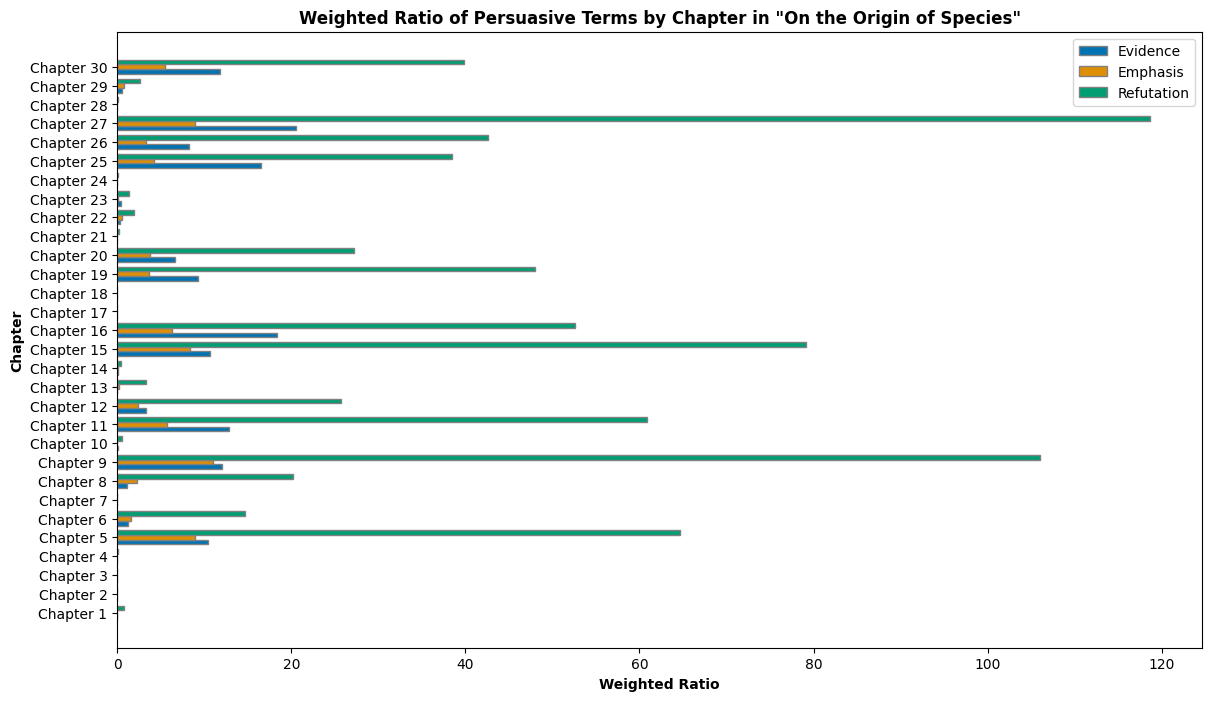

In [463]:
# Define chapter numbers as y-axis labels for the horizontal bar chart
chapters = np.arange(1, len(chapter_lengths) + 1)

# Width of each bar
bar_width = 0.25

# Positions for the bars
r1 = np.arange(len(chapters))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting grouped horizontal bars for weighted frequencies
plt.figure(figsize=(14, 8))
plt.barh(r1, total_weighted_evidence, color=colors[0], height=bar_width, edgecolor='grey', label='Evidence')
plt.barh(r2, total_weighted_emphasis, color=colors[1], height=bar_width, edgecolor='grey', label='Emphasis')
plt.barh(r3, total_weighted_refutation, color=colors[2], height=bar_width, edgecolor='grey', label='Refutation')

# Adding labels and title
plt.ylabel('Chapter', fontweight='bold')
plt.xlabel('Weighted Ratio', fontweight='bold')
plt.title('Weighted Ratio of Persuasive Terms by Chapter in "On the Origin of Species"', fontweight='bold')
plt.yticks([r + bar_width for r in range(len(chapters))], [f"Chapter {i}" for i in chapters])
plt.legend()

plt.show()


#### **Normalizing Term Frequencies by Chapter Length**


This code block handles the normalization of both unweighted and weighted term frequencies by dividing each frequency by the corresponding chapter length. The normalization is crucial for comparing term usage fairly across chapters of varying lengths, ensuring that larger chapters do not disproportionately influence the analysis.

Unweighted Term Frequency Normalization:

We initialize a new dictionary, normalized_unweighted, which stores the normalized unweighted frequencies for each term under each category.
For each term in the unweighted frequency dictionary (chapter_term_frequencies), the frequency is divided by the length of the chapter. If the chapter length is zero, the normalized frequency is set to zero to avoid division errors.
This ensures that the term frequencies reflect density rather than raw counts, allowing fair comparison across chapters.
Weighted Term Frequency Normalization:

Similarly, we initialize a dictionary normalized_weighted to store the normalized weighted frequencies.
For each term in the weighted frequency dictionary (weighted_term_frequencies), the frequency is divided by the chapter length in the same manner as in the unweighted case.
This normalization accounts for both the chapter length and the weight assigned to each chapter based on its length, providing an adjusted measure of term usage per chapter.
By normalizing both the unweighted and weighted term frequencies, this step enables more accurate comparisons across chapters with varying word counts, mitigating the effects of chapter size on term frequency analysis.



In [464]:
# Normalize unweighted term frequencies (divide by chapter length)
normalized_unweighted = {category: {term: [] for term in terms} for category, terms in persuasive_terms.items()}

for category, terms in chapter_term_frequencies.items():
    for term, counts in terms.items():
        normalized_unweighted[category][term] = [count / length if length > 0 else 0 for count, length in zip(counts, chapter_lengths)]

# Normalize weighted term frequencies (divide by chapter length)
normalized_weighted = {category: {term: [] for term in terms} for category, terms in persuasive_terms.items()}

for category, terms in weighted_term_frequencies.items():
    for term, counts in terms.items():
        normalized_weighted[category][term] = [count / length if length > 0 else 0 for count, length in zip(counts, chapter_lengths)]


#### **Calculating Absolute and Relative Differences Between Normalized Weighted and Unweighted Term Frequencies**

In this code block, we calculate both absolute and relative differences between normalized weighted and unweighted term frequencies across all chapters. This helps to quantify the impact of chapter length normalization and chapter weighting on the term frequency analysis.

Initialization:

We initialize two dictionaries, absolute_difference and relative_difference, to store the differences for each persuasive category (evidence, emphasis, refutation) across all chapters.
Calculation of Differences:

For each chapter, we sum the normalized term frequencies for all terms under each category, separately for weighted and unweighted values.
The absolute difference is calculated by subtracting the unweighted sum from the weighted sum and taking the absolute value. This difference reflects the direct impact of weighting on term frequencies.
The relative difference is calculated as the percentage difference relative to the unweighted frequency. If the unweighted frequency is zero, the relative difference is set to zero to avoid division errors.
Averaging Differences:

Once all chapter differences are computed, we calculate the average absolute difference and average relative difference for each category across all chapters.
The absolute difference tells us how much, on average, the normalization and weighting alter the raw frequencies. The relative difference provides insight into the percentage change in frequencies due to normalization.
Displaying Results:

We print the average absolute differences for each category, rounded to four decimal places.
We also print the average relative differences (as percentages) to show the proportional impact of normalization on each persuasive term category.
By understanding these differences, we gain deeper insights into how normalization affects the analysis and how much weighting alters the interpretation of term frequencies across varying chapter lengths.

In [465]:
# Initialize lists to store absolute and relative differences for each category
absolute_difference = {
    'evidence': [],
    'emphasis': [],
    'refutation': []
}

relative_difference = {
    'evidence': [],
    'emphasis': [],
    'refutation': []
}

# Calculate differences between normalized weighted and unweighted frequencies
for category in persuasive_terms.keys():
    for i in range(len(chapters)):
        # Sum all term frequencies for the current chapter in the given category
        weighted_sum = sum(normalized_weighted[category][term][i] for term in persuasive_terms[category])
        unweighted_sum = sum(normalized_unweighted[category][term][i] for term in persuasive_terms[category])

        # Calculate absolute difference
        diff = abs(weighted_sum - unweighted_sum)
        absolute_difference[category].append(diff)

        # Calculate relative difference (avoid division by zero)
        if unweighted_sum != 0:
            rel_diff = (diff / unweighted_sum) * 100
        else:
            rel_diff = 0
        relative_difference[category].append(rel_diff)

# Calculate average differences across all chapters
average_difference = {category: sum(absolute_difference[category]) / len(chapters) for category in persuasive_terms.keys()}
average_relative_difference = {category: sum(relative_difference[category]) / len(chapters) for category in persuasive_terms.keys()}

# Display the average differences
print("Average Absolute Differences (Normalized Weighted vs. Unweighted):")
for category, avg_diff in average_difference.items():
    print(f"{category.capitalize()}: {avg_diff:.4f}")

print("\nAverage Relative Differences (Percentage):")
for category, avg_rel_diff in average_relative_difference.items():
    print(f"{category.capitalize()}: {avg_rel_diff:.2f}%")


Average Absolute Differences (Normalized Weighted vs. Unweighted):
Evidence: 0.0005
Emphasis: 0.0004
Refutation: 0.0055

Average Relative Differences (Percentage):
Evidence: 34.48%
Emphasis: 37.35%
Refutation: 53.40%


#### **Conclusion**


Our analysis highlights the significant impact of chapter length on the perceived frequency of persuasive terms in On the Origin of Species. By comparing both absolute and relative differences between normalized weighted and unweighted term frequencies, we observed how normalization adjusts these frequencies relative to chapter length, resulting in more meaningful comparisons across chapters of varying sizes.

The average absolute differences—0.0005 for "Evidence," 0.0004 for "Emphasis," and 0.0055 for "Refutation"—indicate that normalization slightly alters raw frequencies. However, the average relative differences—34.48% for "Evidence," 37.35% for "Emphasis," and 53.40% for "Refutation"—suggest that normalization substantially affects the apparent frequency of terms, particularly in the "Refutation" category.

Shorter chapters disproportionately affect the analysis if term frequencies are not normalized. For instance, the high relative difference for "Refutation" (53.40%) shows that chapters with fewer words may have a higher density of refutation terms, which skews the overall interpretation without adjustment for length.

This analysis demonstrates the critical role of normalization in ensuring accurate comparisons in textual studies. Adjusting for chapter length helps provide a balanced view of term usage, reflecting the true rhetorical strategies employed in the text. Future studies could explore chapters contributing the most to these differences, confirm the significance through statistical tests, or employ advanced normalization techniques to refine the analysis further.

Mathematical Comparison of Normalized Weighted vs. Unweighted Term Frequencies
To understand the effect of chapter length on persuasive term use, we compared the absolute and relative differences between normalized weighted and unweighted term frequencies across three categories: "Evidence," "Emphasis," and "Refutation."

Normalization ensures that term frequencies are adjusted according to chapter length, allowing fairer comparisons across chapters. Without this adjustment, longer chapters could dominate the analysis, obscuring trends in shorter ones.

Results:
Average Absolute Differences:

The absolute difference quantifies the direct numerical disparity between weighted and unweighted term frequencies. On average, the differences were 0.0005 for "Evidence," 0.0004 for "Emphasis," and 0.0055 for "Refutation." These small values indicate that, although the changes are slight, they are consistent across chapters.
Average Relative Differences:

The relative difference expresses how significant the change is relative to the original frequency. In this analysis, the average relative differences were 34.48% for "Evidence," 37.35% for "Emphasis," and 53.40% for "Refutation." The larger percentage for "Refutation" indicates that normalization has a greater effect on this category, likely due to the higher density of refutation terms in shorter chapters.
Interpretation:
These findings suggest that chapter length significantly influences how persuasive terms are perceived, especially for "Refutation," where the normalization process reveals notable adjustments. The larger relative differences in this category imply that without normalization, shorter chapters may be overrepresented in the analysis.

Significance of Chapter Length:
Normalization ensures that chapter length does not distort the frequency of persuasive terms, offering a more balanced perspective across a text with variable chapter sizes. In long texts like On the Origin of Species, where chapters differ in length, normalization is essential to avoid misinterpreting rhetorical strategies.

By comparing weighted and unweighted frequencies, we gain deeper insights into how chapter length affects term usage. This approach underscores the importance of normalization in literary analysis, particularly when working with texts of uneven structure.

Footnotes: 

Project Strengths:

Clear objective and methodological rigor

Balanced quantitative insights into the effect of normalization

Emphasis on the necessity of adjusting for chapter length


Project Weaknesses:

Lack of justification for the choice of persuasive terms

Absence of statistical significance testing

Incomplete discussion of data limitations and alternative methods

Overall, the assessment is scientifically valid, especially for its focus on textual analysis and normalization. However, it would benefit from some additional rigor in terms of statistical testing, theoretical backing, and acknowledgment of methodological limitations to make the conclusions more robust.

In [466]:
from transformers import pipeline
import re
